In [1]:
import torch
from torch import nn # Contains all of torches for all nureal networks
import matplotlib.pyplot as plt
import numpy as np

# Data preparing and loading , data can be almost anything
* Excel spreadsheet
* Images of any kind
* Videos (Youtube has lots of data...)
* Audio like songs or podcasts
* DNA
* text

Machine learning is two parts:
1. Get data into numerical representations.
2. Build a model to learn patterns in that numerical representation

To showcase this, lets create some known data using linear regression formula

We will use a linear regression formula to make a straight line with known parameters.

weight will be b and bias will be a


In [2]:
# Create known parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(X), len(y)

(50, 50)

In [4]:
y

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260],
        [0.4400],
        [0.4540],
        [0.4680],
        [0.4820],
        [0.4960],
        [0.5100],
        [0.5240],
        [0.5380],
        [0.5520],
        [0.5660],
        [0.5800],
        [0.5940],
        [0.6080],
        [0.6220],
        [0.6360],
        [0.6500],
        [0.6640],
        [0.6780],
        [0.6920],
        [0.7060],
        [0.7200],
        [0.7340],
        [0.7480],
        [0.7620],
        [0.7760],
        [0.7900],
        [0.8040],
        [0.8180],
        [0.8320],
        [0.8460],
        [0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [5]:
### Splitting data into training and test sets (important)
# Create a train/test split 80 / 20 split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [6]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predicitons=None):
  plt.figure(figsize=(10, 7))
  #Plotting training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  #Ploting the test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

  if predicitons is not None:
    plt.scatter(test_data, predicitons, c='r', s=4, label="Predictions")

  #Show legends
  plt.legend(prop={"size": 14})

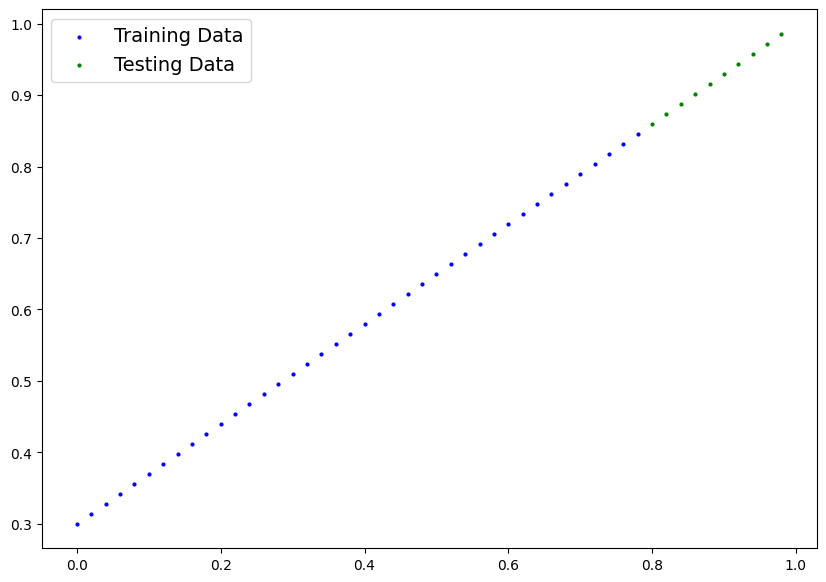

In [7]:
plot_predictions()

# What our model does
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create data)

How does it do so?

Through two main algorithms:
1. Gradient descent
2. Backpropagation

In [8]:
## 2. Build model
#Building our first pytorch model
# Create linear regression model class

class LinearRegressionModel(nn.Module): # Almost everything in pytorch will inherit from nn.Module
  def __init__(self):
    super().__init__()
    # Initalize inital parameters
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.rand(1,
                                        requires_grad=True,
                                        dtype=torch.float))
    # Forward method to define the computation in the
    # Any subclass of nn.module requires a forward method (similar to callback in JS)
    # Forward is the operation it does, need to override the forward method
  def forward(self, x: torch.Tensor) -> torch.Tensor: # "x" is the input data
    return self.weights * x + self.bias     # This is the linear regression formual

### Pytorch model building essentials
* torch.nn - Contains all of the building blocks for neural networks
* torch.nn.Parameter - what parameters should our model try and learn, often a pytorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all nueral network modules, if you subclass it you should overwrite forward()
* torch.optim - this is where the optimizers in Pytorch live, they will help with gradient descent
* def forward() - All nn.module subclasses require you to overwrite forward(), this method **Defines what happens in the forward computation**

# To see what our contents of our pytorch model is
We can check our models parameters or whats insie our model using `.parameters()`

In [9]:
# Create a random seed
torch.manual_seed(42)
epoch_count = []
loss_values = []
test_loss_values = []

# Create an instance of the model we created (Subclass of nn.Module)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [10]:
#List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.3904]))])

In [11]:
weight, bias

(0.7, 0.3)

In [12]:
## Making predicitions using torch.inference_mode()
# To check our models predictive power, lets see how well it predicts 'y_test', based on 'x_test''
# When we pass data through the model, it will run it through the forward() method.

In [13]:
# Making predicitons with model
# Inference is a context manager (prediction)
# Inference mode turns off the gradient tracking, inference isnt training. We do not need to keep track of our models cause were not training
# Behind the scenes it is keeping track of less data.
# Can do the same with torch.no_grad(), however torch.inference_mode() is prefered
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.6598],
        [0.6665],
        [0.6733],
        [0.6800],
        [0.6867],
        [0.6935],
        [0.7002],
        [0.7069],
        [0.7137],
        [0.7204]])

In [14]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

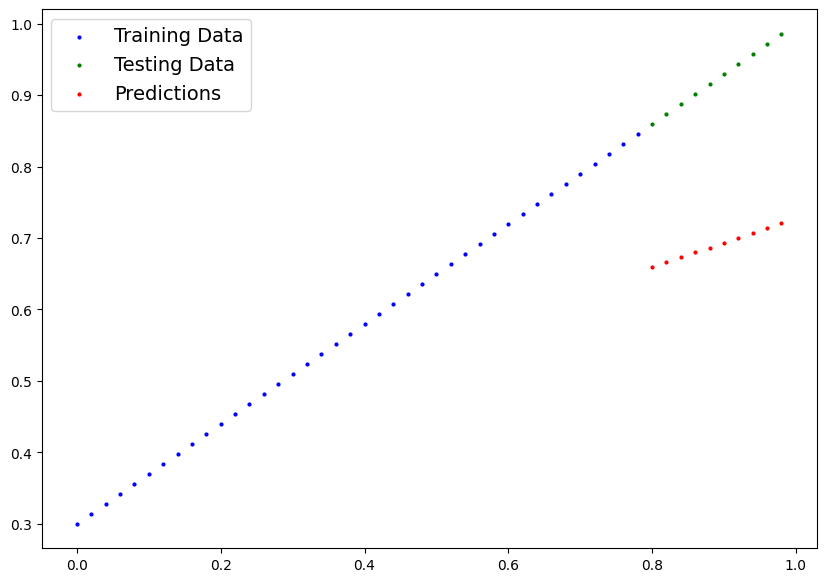

In [15]:
plot_predictions(predicitons=y_preds)

## Traning model
The whole purpose of training is for a model to move from some unknown parameters (could be random) to some known parameters.
- From a poor representation to a good representation of data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.

* Note: Loss function may also be called cost function, or criterion in different areas. In ML case it is the loss function

Things we need to train:

* **Loss function:** a function to measure how wrong the model's predictions are to the ideal out puts. Lower the value the better

* **Optimizer:** Takes into account the loss of a model and adjusts the models parameters (weight and basis) In our case to improve the loss function.


Inside the optimizer youll often have to set two parameters:
1. `params` - the model parameters you'd like to optimize, for example `params=model_0.parameters()`
2. `lr` (learning rate) - the learning rate is hyperparameter that defines how big/small the optimizer changes the parameters with each step (a lr results in small changes, a large lr results in large changes)
And specifically for PyTorch we need a:
- Training loop
- A testing loop



In [16]:
# Setup a loss function
loss_fn = nn.L1Loss()


# Set up an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = learning rate = possibly the most important hyper paramter we can set

## Building a training loop, and testing loop in pytorch

Things we need in a training loop:
0. Loop through the data : and do all the following steps within the loop
1. forward pass (this involves data moving through our model forward functions) - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. optimizer zero grad
4. Loss backward - Move backwards through the network to calculate the gradients each of the parameters of our jodels with respect to the loss. (**Backpropragation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**graident descent**)


In [17]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [18]:
torch.manual_seed(42)

# an Epoch is one loop through the data... (this is a hyperparameter because we set them our selfs)
epochs = 500
# Tracking different values to compare future experiements
epoch_count_list = []
loss_values_list = []
test_loss_values_list = []
### Training

# Step 0. loop through the data
for epoch in range(epochs):
  # Set model to the training mode
  model_0.train() # Set all parameters that requires gradients to require gradients

  # Step 1. Forward Pass
  y_pred = model_0(X_train)

  # Step 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # Step 3. Optimizer zero grad
  optimizer.zero_grad()

  # Step 4. perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # Step 4. Step the optimizer (perform graident descent)
  optimizer.step() # By default how the optimizer changes will acculumate through th loop so... we have to zero them aboe in step 3 for the next interation of the loop


  # Testing Mode
  model_0.eval() # Turns off gradient tracking, turns of certain training settings to be able to run tests
  with torch.inference_mode():  # Turns of gradient tracking and a couple more behind the scene settings
    # 1. Forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print out whats happening:
  if epoch % 10 == 0:
    epoch_count_list.append(epoch)
    loss_values_list.append(loss)
    test_loss_values_list.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.08169572055339813 | Test Loss: 0.22662055492401123
OrderedDict([('weights', tensor([0.3398])), ('bias', tensor([0.3939]))])
Epoch: 10 | Loss: 0.06808149069547653 | Test Loss: 0.1807345449924469
OrderedDict([('weights', tensor([0.3672])), ('bias', tensor([0.4154]))])
Epoch: 20 | Loss: 0.06258393079042435 | Test Loss: 0.15627031028270721
OrderedDict([('weights', tensor([0.3891])), ('bias', tensor([0.4204]))])
Epoch: 30 | Loss: 0.05879194289445877 | Test Loss: 0.1418602615594864
OrderedDict([('weights', tensor([0.4081])), ('bias', tensor([0.4179]))])
Epoch: 40 | Loss: 0.05530194193124771 | Test Loss: 0.13084018230438232
OrderedDict([('weights', tensor([0.4261])), ('bias', tensor([0.4129]))])
Epoch: 50 | Loss: 0.051822252571582794 | Test Loss: 0.12050700187683105
OrderedDict([('weights', tensor([0.4439])), ('bias', tensor([0.4074]))])
Epoch: 60 | Loss: 0.04838593676686287 | Test Loss: 0.11223447322845459
OrderedDict([('weights', tensor([0.4610])), ('bias', tensor([0.4004

In [19]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [20]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6962])), ('bias', tensor([0.3064]))])

In [21]:
weight, bias

(0.7, 0.3)

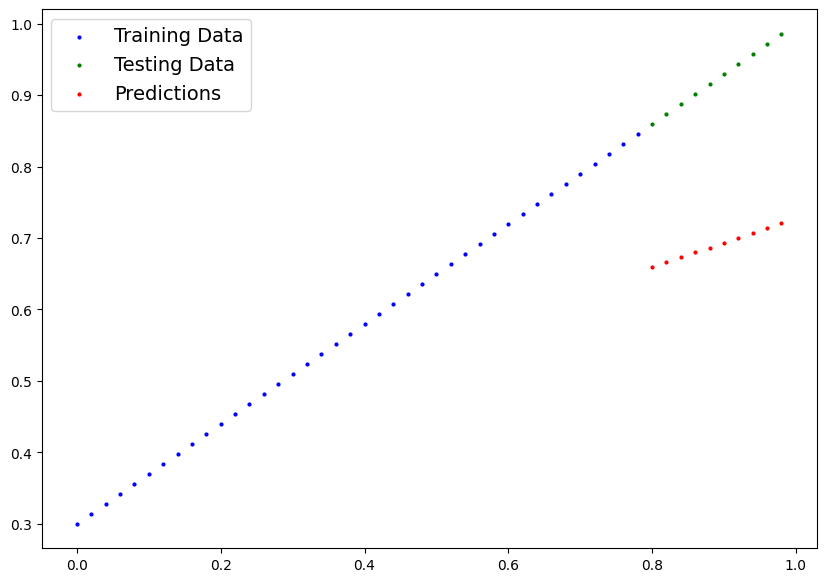

In [22]:
# Before training (looping through and making the loss get smaller by utilizing gradient descent, and the optimizer)
plot_predictions(predicitons=y_preds)

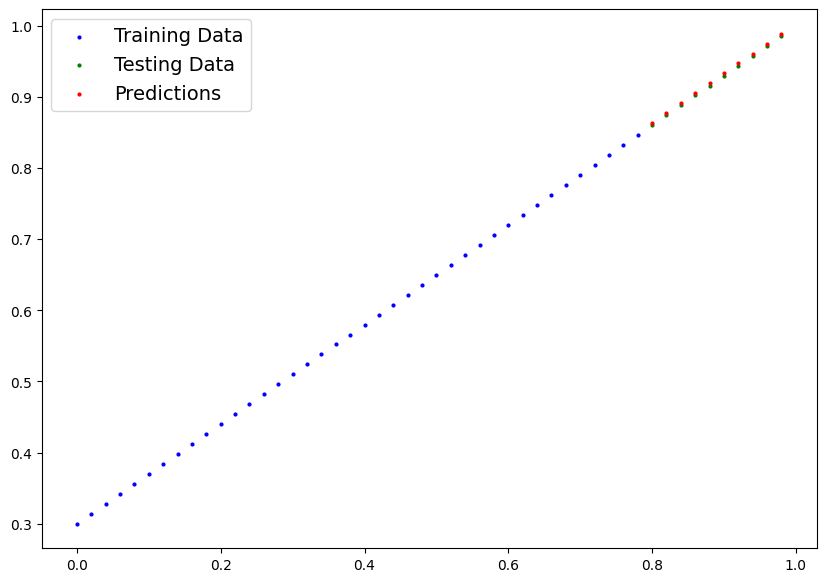

In [23]:
# I ran it about 1.3k times. The loss went down, and the weight got closer to .7 and bias got closer to .3
# After doing the training loop.
plot_predictions(predicitons=y_preds_new)

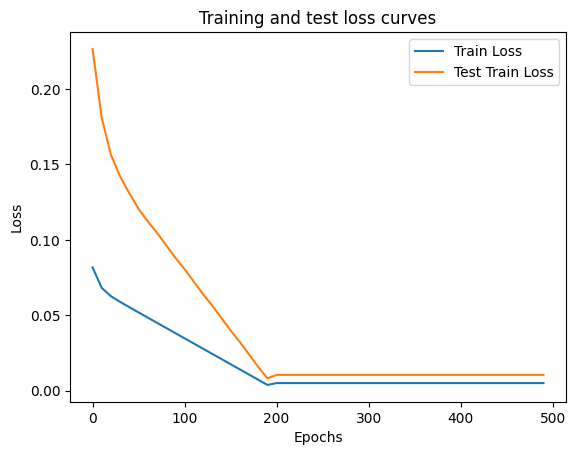

In [24]:
# Plot the loss curves
plt.plot(epoch_count_list, np.array(torch.tensor(loss_values_list).numpy()), label="Train Loss")
plt.plot(epoch_count_list, test_loss_values_list, label="Test Train Loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();